# **Enernoc 100 Building Analysis!**

## By Arjun M

In [3]:
#Importing required libraries

import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

import pandas as pd

import json

import os

from matplotlib.pyplot import *

import ipyleaflet as ipyl
import ipywidgets as ipyw
import json

from ipyleaflet import (
    Map,
    Marker,
    TileLayer, ImageOverlay,
    Polyline, Polygon, Rectangle, Circle, CircleMarker,
    GeoJSON,
    DrawControl
)


### Importing Meta data file, which contains: INDUSTRY, SUB INDUSTRY, SQ FOOT etc. 

In [4]:

meta_df =  pd.read_csv("C:/Users/arjun/Documents/Enernoc_Project_Aj/meta/all_sites.csv")



### Importing Sampple data file from csv 10, which contains: VALUE, date and time, estimated etc.

In [5]:
sample_df = pd.read_csv("C:/Users/arjun/Documents/Enernoc_Project_Aj/Data_csv/csv/10.csv")

In [6]:
rawfilepath = "C:/Users/arjun/Documents/Enernoc_Project_Aj/Data_csv/csv/"

In [7]:
filelist = os.listdir(rawfilepath)

In [8]:
df_df= pd.read_csv("C:/Users/arjun/Documents/Enernoc_Project_Aj/Data_csv/csv/6.csv")

In [9]:
df_df.head(5)

timestamp             dttm_utc    value  estimated  anomaly
0  1325376600  2012-01-01 00:10:00  52.1147          0      NaN
1  1325376900  2012-01-01 00:15:00  50.9517          0      NaN
2  1325377200  2012-01-01 00:20:00  49.8164          0      NaN
3  1325377500  2012-01-01 00:25:00  49.1795          0      NaN
4  1325377800  2012-01-01 00:30:00  47.6288          0      NaN

In [10]:
sample_df.head()

timestamp             dttm_utc     value  estimated  anomaly
0  1325376600  2012-01-01 00:10:00  105.7895          0      NaN
1  1325376900  2012-01-01 00:15:00  104.7318          0      NaN
2  1325377200  2012-01-01 00:20:00  102.2920          0      NaN
3  1325377500  2012-01-01 00:25:00  102.7851          0      NaN
4  1325377800  2012-01-01 00:30:00  101.6106          0      NaN

In [11]:
meta_df.head()

SITE_ID             INDUSTRY                   SUB_INDUSTRY    SQ_FT  \
0        6  Commercial Property  Shopping Center/Shopping Mall   161532   
1        8  Commercial Property  Shopping Center/Shopping Mall   823966   
2        9  Commercial Property               Corporate Office   169420   
3       10  Commercial Property  Shopping Center/Shopping Mall  1029798   
4       12  Commercial Property              Business Services   179665   

         LAT         LNG         TIME_ZONE TZ_OFFSET  
0  34.783001 -106.895250    America/Denver    -06:00  
1  40.320247  -76.404942  America/New_York    -04:00  
2  40.946751  -74.742087  America/New_York    -04:00  
3  39.732504  -75.006861  America/New_York    -04:00  
4  39.694541  -74.899166  America/New_York    -04:00

In [12]:
meta_df.describe()

SITE_ID         SQ_FT         LAT         LNG
count  100.000000  1.000000e+02  100.000000  100.000000
mean   338.880000  2.252528e+05   38.345746  -90.367199
std    276.371119  3.448437e+05    3.535717   18.734536
min      6.000000  1.821000e+03   27.848625 -122.701918
25%     85.500000  4.266150e+04   35.348406 -113.043608
50%    278.000000  9.210550e+04   38.729362  -80.486509
75%    546.000000  2.022598e+05   40.758628  -75.206820
max    887.000000  1.807149e+06   47.820017  -71.060518

In [13]:
meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
SITE_ID         100 non-null int64
INDUSTRY        100 non-null object
SUB_INDUSTRY    100 non-null object
SQ_FT           100 non-null int64
LAT             100 non-null float64
LNG             100 non-null float64
TIME_ZONE       100 non-null object
TZ_OFFSET       100 non-null object
dtypes: float64(2), int64(2), object(4)
memory usage: 6.3+ KB


In [14]:
meta_df.dtypes

SITE_ID           int64
INDUSTRY         object
SUB_INDUSTRY     object
SQ_FT             int64
LAT             float64
LNG             float64
TIME_ZONE        object
TZ_OFFSET        object
dtype: object

In [15]:
from IPython.display import HTML
HTML('<iframe src=http://enernoc-open.cartodb.com/tables/all_sites/embed_map?title=true&description=true&search=false&shareable=false&cartodb_logo=true&scrollwheel=true&sql=&sw_lat=25&sw_lon=-130&ne_lat=50&ne_lon=-60 width=800 height=700></iframe>')


In [16]:


# meta_df.hist(column='SQ_FT', figsize=(15,8), bins = 30, color='g')

# plt.title('Square feet')
# plt.xlabel("Square Footage")
# plt.ylabel("Number of buildings in each bin")
# plt.locator_params(nbins=15)

#### Plotting a bar graph to see the Squarefoot of the buildings

In [17]:
# meta_df.sort('SQ_FT',ascending=False).plot(kind='hist',y='SQ_FT',x='SITE_ID', figsize=(18,9), color='darkblue')

C:\Users\arjun\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


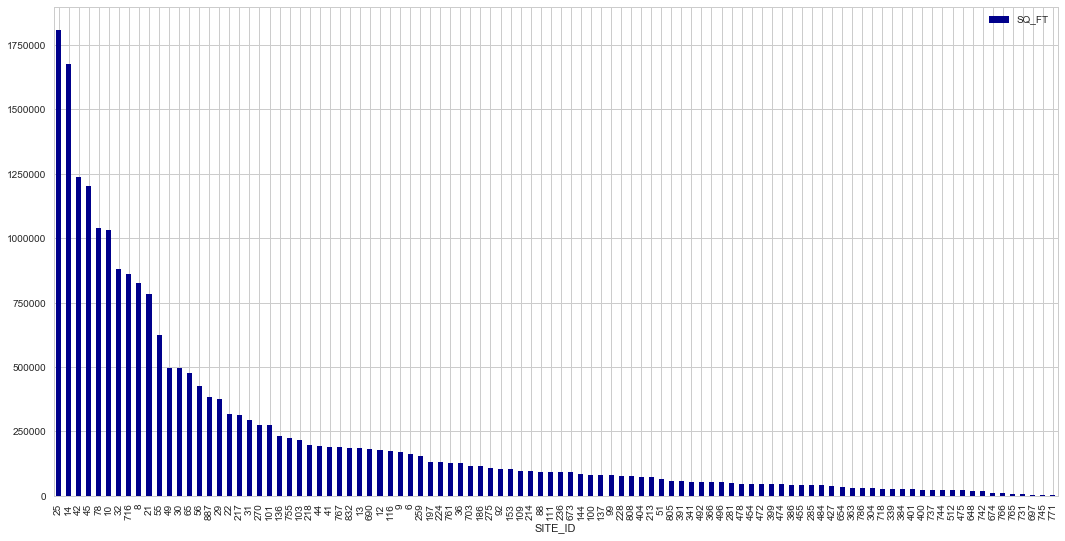

In [18]:
meta_df.sort('SQ_FT',ascending=False).plot(kind='bar',y='SQ_FT',x='SITE_ID', figsize=(18,9), color='darkblue')

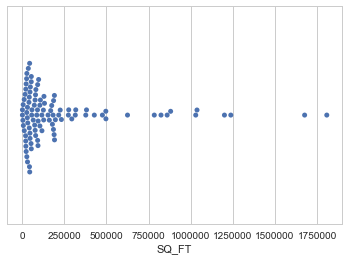

In [19]:
ax = sns.swarmplot(x=meta_df["SQ_FT"])

 #### we have a majority of buildings under 200,000 sqft

In [20]:
# meta_pivoted_1 = meta_df.pivot(index='SITE_ID', columns='TIME_ZONE', values='SQ_FT')

In [21]:
# meta_pivoted_1.plot(kind='hist', figsize=(12,8),bins=40, stacked=True)
# plt.xlabel("Square Footage")
# plt.ylabel("Number of buildings in each bin")
# plt.locator_params(nbins=15)

### Finding the count based on SUB INDUSTRY and plotting it 

In [22]:
meta_df['SUB_INDUSTRY'].value_counts()

Grocer/Market                    25
Primary/Secondary School         25
Food Processing                  19
Shopping Center/Shopping Mall    14
Manufacturing                     5
Commercial Real Estate            4
Business Services                 3
Bank/Financial Services           2
Corporate Office                  2
Other Light Industrial            1
Name: SUB_INDUSTRY, dtype: int64

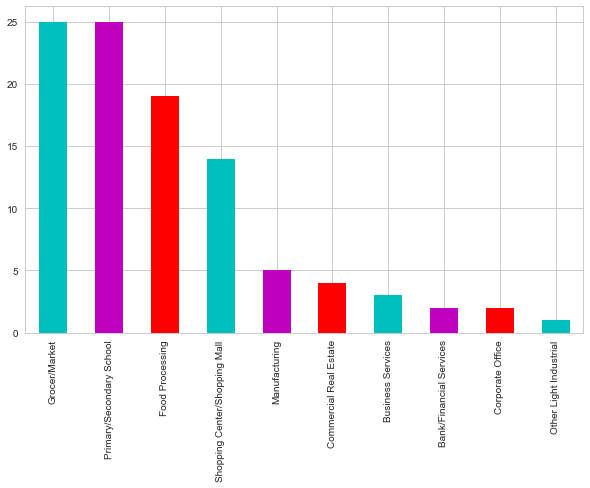

In [23]:
meta_df['SUB_INDUSTRY'].value_counts().plot(
     kind='bar', color= 'cmr', figsize=(10,6) )

In [24]:
#Checking Null values

meta_df.isnull().sum()

SITE_ID         0
INDUSTRY        0
SUB_INDUSTRY    0
SQ_FT           0
LAT             0
LNG             0
TIME_ZONE       0
TZ_OFFSET       0
dtype: int64

#### There are no NAN values in meta dataset. 

### Grouping by Industry, Sub industry with count and plotting it !

In [25]:
meta_df.groupby(['INDUSTRY', 'SUB_INDUSTRY']).size().sort_values(ascending=False)

INDUSTRY              SUB_INDUSTRY                 
Food Sales & Storage  Grocer/Market                    25
Education             Primary/Secondary School         25
Light Industrial      Food Processing                  19
Commercial Property   Shopping Center/Shopping Mall    14
Light Industrial      Manufacturing                     5
Commercial Property   Commercial Real Estate            4
                      Business Services                 3
                      Corporate Office                  2
                      Bank/Financial Services           2
Light Industrial      Other Light Industrial            1
dtype: int64

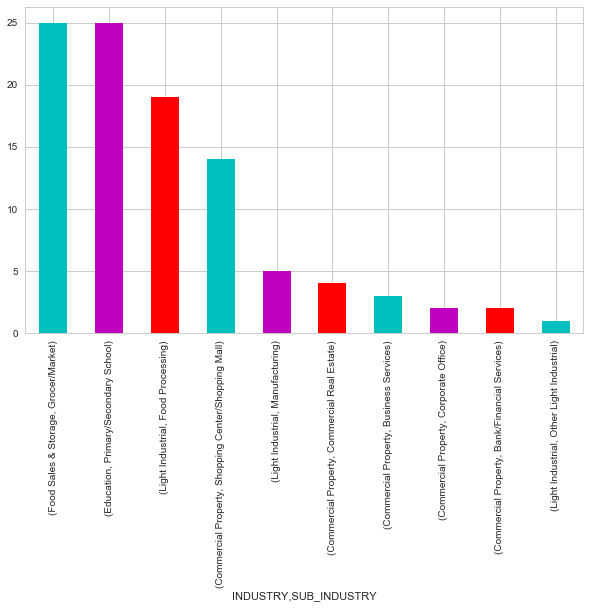

In [26]:
meta_df.groupby(['INDUSTRY', 'SUB_INDUSTRY']).size().sort_values(ascending=False).plot(
     kind='bar', color= 'cmr', figsize=(10,6) )

### Plotting scatter plot for Square footage based on Industry and Sub industry

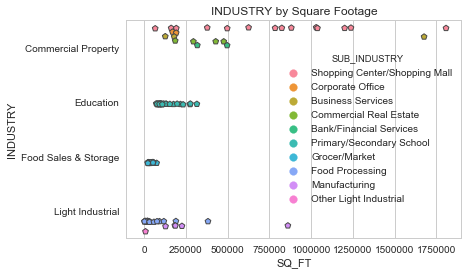

In [27]:
ax = sns.stripplot(x="SQ_FT", y="INDUSTRY",hue = "SUB_INDUSTRY",
                   data=meta_df, jitter=True ,size= 6, marker= "p" ,linewidth=1,split=True)
sns.plt.title("INDUSTRY by Square Footage",fontsize=12)

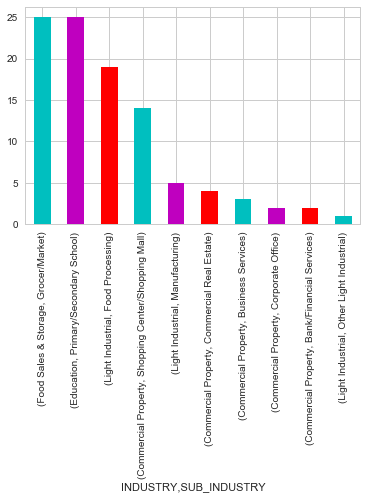

In [28]:
# Groupping by Industry  and Sub Industry
meta_df.groupby(['INDUSTRY', 'SUB_INDUSTRY']).size().sort_values(ascending=False).plot(
     kind='bar', color= 'cmr' )

In [29]:
# meta_df.groupby(['TIME_ZONE','INDUSTRY', 'SUB_INDUSTRY']).size().sort_values(ascending=False).plot(
#      kind='bar', color= 'cmr', figsize=(10,6) )

In [30]:
# Groupping by TIME ZONE,INDUSTRY, SUB INDUSTRY

meta_df.groupby(['TIME_ZONE','INDUSTRY', 'SUB_INDUSTRY']).size().sort_values(ascending=False)

TIME_ZONE            INDUSTRY              SUB_INDUSTRY                 
America/Los_Angeles  Food Sales & Storage  Grocer/Market                    17
America/New_York     Education             Primary/Secondary School         15
                     Light Industrial      Food Processing                  11
                     Commercial Property   Shopping Center/Shopping Mall     9
                     Food Sales & Storage  Grocer/Market                     8
America/Chicago      Education             Primary/Secondary School          7
America/Los_Angeles  Light Industrial      Food Processing                   3
America/Chicago      Light Industrial      Manufacturing                     3
America/Denver       Education             Primary/Secondary School          3
America/Chicago      Commercial Property   Shopping Center/Shopping Mall     3
America/New_York     Commercial Property   Commercial Real Estate            3
                                           Business Servic

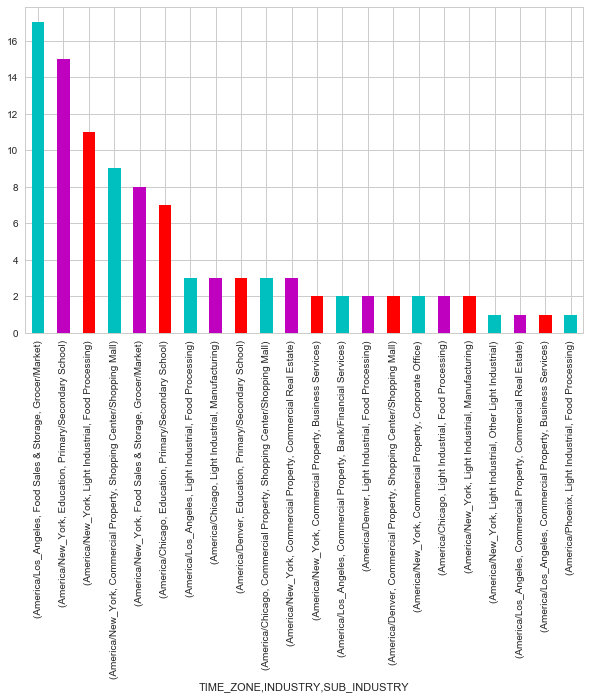

In [31]:
## Plotting by TIME ZONE,INDUSTRY, SUB INDUSTRY

meta_df.groupby(['TIME_ZONE','INDUSTRY', 'SUB_INDUSTRY']).size().sort_values(ascending=False).plot(
     kind='bar', color= 'cmr', figsize=(10,6) )

### Dropping colunms: LAT','LNG','TZ_OFFSET from data set and naming the data set as meta_hdf

In [32]:
meta_hdf = meta_df.drop(['LAT','LNG','TZ_OFFSET', 'SITE_ID'], axis=1)

In [33]:

meta_hdf.sort_values(by= 'SQ_FT', ascending = False)[:10]



INDUSTRY                   SUB_INDUSTRY    SQ_FT  \
9   Commercial Property  Shopping Center/Shopping Mall  1807149   
6   Commercial Property              Business Services  1675720   
16  Commercial Property  Shopping Center/Shopping Mall  1237908   
18  Commercial Property  Shopping Center/Shopping Mall  1200131   
24  Commercial Property  Shopping Center/Shopping Mall  1037364   
3   Commercial Property  Shopping Center/Shopping Mall  1029798   
13  Commercial Property  Shopping Center/Shopping Mall   880941   
82     Light Industrial                  Manufacturing   860258   
1   Commercial Property  Shopping Center/Shopping Mall   823966   
7   Commercial Property  Shopping Center/Shopping Mall   783982   

              TIME_ZONE  
9      America/New_York  
6   America/Los_Angeles  
16     America/New_York  
18      America/Chicago  
24      America/Chicago  
3      America/New_York  
13      America/Chicago  
82      America/Chicago  
1      America/New_York  
7      America/New_York

In [34]:
# meta_pivoted_2 = meta_df.pivot( columns='SUB_INDUSTRY', values='SQ_FT')

In [35]:
# meta_pivoted_2.plot(kind='bar', figsize=(12,8))
# plt.xlabel("Square Footage")
# plt.ylabel("Number of buildings in each bin")
# plt.locator_params(nbins=15)

### Grouping by Time zone, Industry and Sub industry with MAXIMUM values of Square footage. 

In [36]:
meta_hdf.groupby(['TIME_ZONE','INDUSTRY', 'SUB_INDUSTRY']).max()

SQ_FT
TIME_ZONE           INDUSTRY             SUB_INDUSTRY                          
America/Chicago     Commercial Property  Shopping Center/Shopping Mall  1200131
                    Education            Primary/Secondary School        274418
                    Light Industrial     Food Processing                  33596
                                         Manufacturing                   860258
America/Denver      Commercial Property  Shopping Center/Shopping Mall   161532
                    Education            Primary/Secondary School         92032
                    Light Industrial     Food Processing                  31727
America/Los_Angeles Commercial Property  Bank/Financial Services         496517
                                         Business Services              1675720
                                         Commercial Real Estate          294651
                    Food Sales & Storage Grocer/Market                    52890
                    Light Industrial     Food Processing                 189836
America/New_York    Commercial Property  Business Services               179665
                                         Commercial Real Estate          476246
                                         Corporate Office                191554
                                         Shopping Center/Shopping Mall  1807149
                    Education            Primary/Secondary School        315404
                    Food Sales & Storage Grocer/Market                    74493
                    Light Industrial     Food Processing                 381939
                                         Manufacturing                   225974
                                         Other Light Industrial            7394
America/Phoenix     Light Industrial     Food Processing                   1821

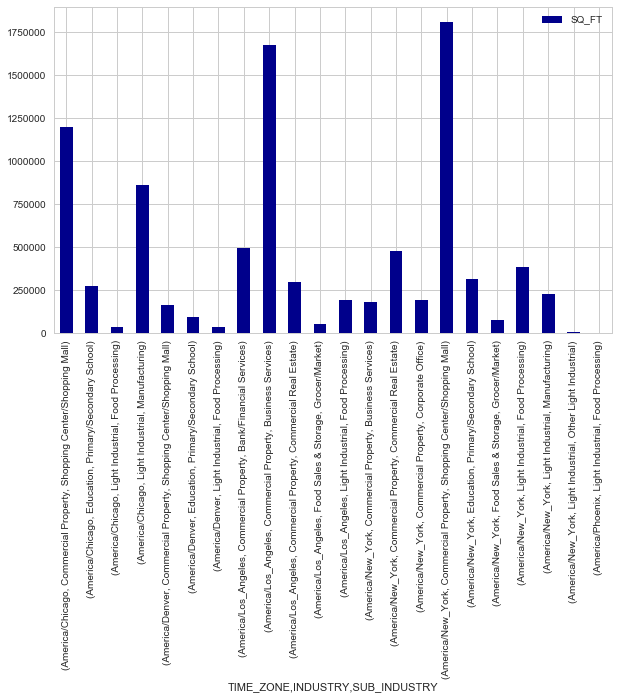

In [37]:
# Groupping and plotting by TIME ZONE,INDUSTRY, SUB INDUSTRY by Squarefootage
meta_hdf.groupby(['TIME_ZONE','INDUSTRY', 'SUB_INDUSTRY']).max().plot(
     kind='bar', color= 'darkblue', figsize=(10,6) )

In [38]:
# meta_hdf.groupby([ 'SQ_FT']).max('TIME_ZONE')

### Merging data sets in csv.

In [39]:
all_dict = {}

In [40]:
rawfilepath1 = "C:/Users/arjun/Documents/Enernoc_Project_Aj/Data_csv/csv/7.csv"

In [41]:
for filename in filelist:
#     print "Loading "+filename
    
    try:
        df = pd.read_csv(os.path.join(rawfilepath,filename), index_col="dttm_utc", parse_dates=True)
        df = df.drop(["timestamp"], axis=1).tz_localize('UTC')   
            
        #Get the SITE_ID from the filename
        SITE_ID = filename[:-4]
        all_dict[SITE_ID] = df
    except:
        
        print ("Error loading "+filename)
    
all_raw_df = pd.concat(all_dict, axis=1)

Error loading ._.DS_Store
Error loading index.html


In [42]:
all_raw_df_valuesonly = all_raw_df.xs('value', level=1, axis=1)

In [43]:
all_raw_df.sample()

10                        100            \
                              value estimated anomaly    value estimated   
dttm_utc                                                                   
2012-07-10 13:15:00+00:00  447.1089       0.0     NaN  10.7673         0   

                                       101                        103   ...    \
                          anomaly    value estimated anomaly    value   ...     
dttm_utc                                                                ...     
2012-07-10 13:15:00+00:00     NaN  34.9782         0     NaN  22.5459   ...     

                              887        9                        92  \
                          anomaly    value estimated anomaly   value   
dttm_utc                                                               
2012-07-10 13:15:00+00:00     NaN  52.6124         0     NaN  2.1106   

                                                  99                    
                          estimated anomaly    value estimated anomaly  
dttm_utc                                                                
2012-07-10 13:15:00+00:00         0     NaN  12.6355         0     NaN  

[1 rows x 300 columns]

In [44]:
all_raw_df_valuesonly.sample(3)

10     100      101      103      109  \
dttm_utc                                                                 
2012-04-21 18:45:00+00:00  288.4278  2.3636  11.6594  21.3592   6.9699   
2012-12-30 13:25:00+00:00  248.1249  4.2019  30.3758  10.6796   7.4960   
2012-05-28 17:40:00+00:00  179.2056  7.0907  13.8072  42.7185  16.9646   

                              111      116       12       13      136   ...    \
dttm_utc                                                                ...     
2012-04-21 18:45:00+00:00  5.2265  16.2554  32.0063  32.4239  10.8705   ...     
2012-12-30 13:25:00+00:00  4.0651  16.2554  25.0049  25.3312   2.3381   ...     
2012-05-28 17:40:00+00:00  5.8072  27.8665  48.0094  48.6359   1.5839   ...     

                                786        8     805     808      832      88  \
dttm_utc                                                                        
2012-04-21 18:45:00+00:00  253.3193  20.9518  3.3754  2.4723  18.1388  5.3383   
2012-12-30 13:25:00+00:00  230.2903  27.9357  2.7263  4.3952  24.1851  4.1520   
2012-05-28 17:40:00+00:00    7.6763  13.9678  2.7263  7.4169  12.0925  5.9314   

                               887        9      92      99  
dttm_utc                                                     
2012-04-21 18:45:00+00:00  85.3634  42.0899  1.5830  2.6324  
2012-12-30 13:25:00+00:00  65.3116  17.9272  2.1106  5.2648  
2012-05-28 17:40:00+00:00  65.8845  52.6124  3.1659  4.7383  

[3 rows x 100 columns]

In [45]:
# all_raw_df_valuesonly['10'].nlargest(1)

In [46]:
# all_raw_df_valuesonly.values.max(axis=1)

In [47]:
# all_raw_df['100'].sort_values(by ='value', ascending=False).head(5)

In [48]:
# all_raw_df.max(axis=0)

### Aggregate the data to hourly and daily
It can be noticed that the resultant dataset uses 86MB of memory -- that takes a while to plot so let's see the whole dataset in an aggregated daily frequency.

Let's use .resample() to average across each hour to create an effective average kWh value and then sum those values across 24 hours to get

In [49]:
all_raw_df_valuesonly_hourly = all_raw_df_valuesonly.truncate(after='2012-12-31').resample('H')
all_raw_df_valuesonly_daily = all_raw_df_valuesonly_hourly.resample('D', how='sum')

C:\Users\arjun\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: .resample() is now a deferred operation
use .resample(...).mean() instead of .resample(...)
  from ipykernel import kernelapp as app
C:\Users\arjun\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  from ipykernel import kernelapp as app


In [50]:
all_raw_df_valuesonly_hourly.sample(4)

C:\Users\arjun\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: .resample() is now a deferred operation
use .resample(...).mean() instead of .resample(...)
  if __name__ == '__main__':


10        100        101        103  \
dttm_utc                                                                 
2012-01-19 06:00:00+00:00  287.568050   4.442625  41.677258  13.398992   
2012-11-03 05:00:00+00:00  173.559717   2.932583  29.122933  10.284067   
2012-08-31 05:00:00+00:00  379.217592   3.085750  27.102992  11.767350   
2012-05-10 14:00:00+00:00  348.141433  16.216675  60.547067  37.180892   

                                 109        111        116        12  \
dttm_utc                                                               
2012-01-19 06:00:00+00:00   6.619233   9.832333  13.352650  26.67190   
2012-11-03 05:00:00+00:00   6.312400   4.790975  14.126717  23.75465   
2012-08-31 05:00:00+00:00   7.868592  11.469300  17.610017  29.58915   
2012-05-10 14:00:00+00:00  23.320817   9.920692  35.703925  62.51230   

                                  13        136    ...             786  \
dttm_utc                                           ...                   
2012-01-19 06:00:00+00:00  27.019917   3.009892    ...      239.885733   
2012-11-03 05:00:00+00:00  24.064608   5.834358    ...      249.481150   
2012-08-31 05:00:00+00:00  29.975233   3.099442    ...      246.922383   
2012-05-10 14:00:00+00:00  63.327975  11.993958    ...      240.525425   

                                    8        805        808         832  \
dttm_utc                                                                  
2012-01-19 06:00:00+00:00  142.006383  13.177192   4.647008  122.940858   
2012-11-03 05:00:00+00:00   23.861758   2.877767   3.067483   20.658092   
2012-08-31 05:00:00+00:00  182.745892  12.376617   3.227725  158.210775   
2012-05-10 14:00:00+00:00  169.942050  10.353542  16.962625  147.125958   

                                  88         887          9        92  \
dttm_utc                                                                
2012-01-19 06:00:00+00:00  10.042567   55.094775  21.077450  1.934733   
2012-11-03 05:00:00+00:00   4.893400   47.599183  16.887917  1.407100   
2012-08-31 05:00:00+00:00  11.714525   43.970775  17.082792  2.066658   
2012-05-10 14:00:00+00:00  10.132825  126.087742  41.375433  3.473725   

                                  99  
dttm_utc                              
2012-01-19 06:00:00+00:00   4.650542  
2012-11-03 05:00:00+00:00   2.983367  
2012-08-31 05:00:00+00:00   4.343442  
2012-05-10 14:00:00+00:00  18.382825  

[4 rows x 100 columns]

In [51]:
all_raw_df_valuesonly_daily.head()

10         100         101         103  \
dttm_utc                                                                     
2012-01-01 00:00:00+00:00  2227.866150  132.272064  647.547745  285.972052   
2012-01-02 00:00:00+00:00  4395.043692  142.733033  402.990950  313.664508   
2012-01-03 00:00:00+00:00  6727.148750  219.089267  517.027975  596.624700   
2012-01-04 00:00:00+00:00  7348.404608  229.024992  517.871833  664.212508   
2012-01-05 00:00:00+00:00  7590.665108  204.404517  495.345708  644.732142   

                                  109         111         116          12  \
dttm_utc                                                                    
2012-01-01 00:00:00+00:00  142.843114  177.243423  285.718562  622.773645   
2012-01-02 00:00:00+00:00  157.623525  188.581342  323.463108  743.312892   
2012-01-03 00:00:00+00:00  182.095175  278.531783  417.609017  965.939517   
2012-01-04 00:00:00+00:00  296.003125  296.506375  527.527325  999.779617   
2012-01-05 00:00:00+00:00  285.066117  307.030192  478.277275  995.028675   

                                    13         136     ...              786  \
dttm_utc                                               ...                    
2012-01-01 00:00:00+00:00   630.780185   56.824453     ...      5585.005014   
2012-01-02 00:00:00+00:00   753.011958   56.887658     ...      5950.445317   
2012-01-03 00:00:00+00:00   978.543817  187.756567     ...      5990.746117   
2012-01-04 00:00:00+00:00  1012.825417  287.316017     ...      5868.564375   
2012-01-05 00:00:00+00:00  1008.012533  224.004767     ...      5677.935300   

                                     8         805         808          832  \
dttm_utc                                                                      
2012-01-01 00:00:00+00:00   508.080998   55.716354  138.412173   439.865925   
2012-01-02 00:00:00+00:00   551.148500   56.592558  149.299450   477.151442   
2012-01-03 00:00:00+00:00  1428.211917  282.823142  229.167550  1236.462483   
2012-01-04 00:00:00+00:00  3678.779817  292.776367  239.560350  3184.873517   
2012-01-05 00:00:00+00:00  3791.104600  291.716117  213.807333  3282.117833   

                                   88          887           9         92  \
dttm_utc                                                                    
2012-01-01 00:00:00+00:00  181.058052  1387.556938  460.166855  43.947485   
2012-01-02 00:00:00+00:00  192.612817  1433.991233  663.305925  49.115975   
2012-01-03 00:00:00+00:00  284.487383  2682.932817  749.726808  65.956867   
2012-01-04 00:00:00+00:00  302.846250  2950.242733  780.190050  69.870208   
2012-01-05 00:00:00+00:00  313.595042  2789.637292  754.630675  73.475908   

                                   99  
dttm_utc                               
2012-01-01 00:00:00+00:00   64.078505  
2012-01-02 00:00:00+00:00   86.188617  
2012-01-03 00:00:00+00:00  254.507800  
2012-01-04 00:00:00+00:00  283.288583  
2012-01-05 00:00:00+00:00  239.064533  

[5 rows x 100 columns]

### Let's plot all the daily and hourly using subplots

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000191797E0E80>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000019134A7BE80>], dtype=object)

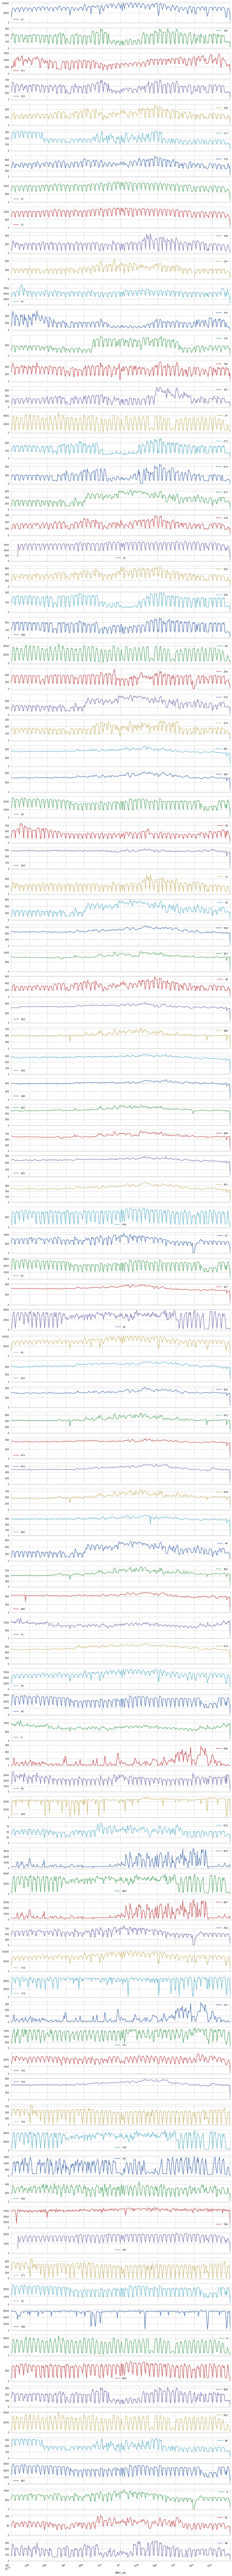

In [52]:
all_raw_df_valuesonly_daily.plot(subplots=True, figsize=(15,200))

C:\Users\arjun\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: .resample() is now a deferred operation
use .resample(...).mean() instead of .resample(...)
  if __name__ == '__main__':


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000019179C34C18>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000019153F4BAC8>], dtype=object)

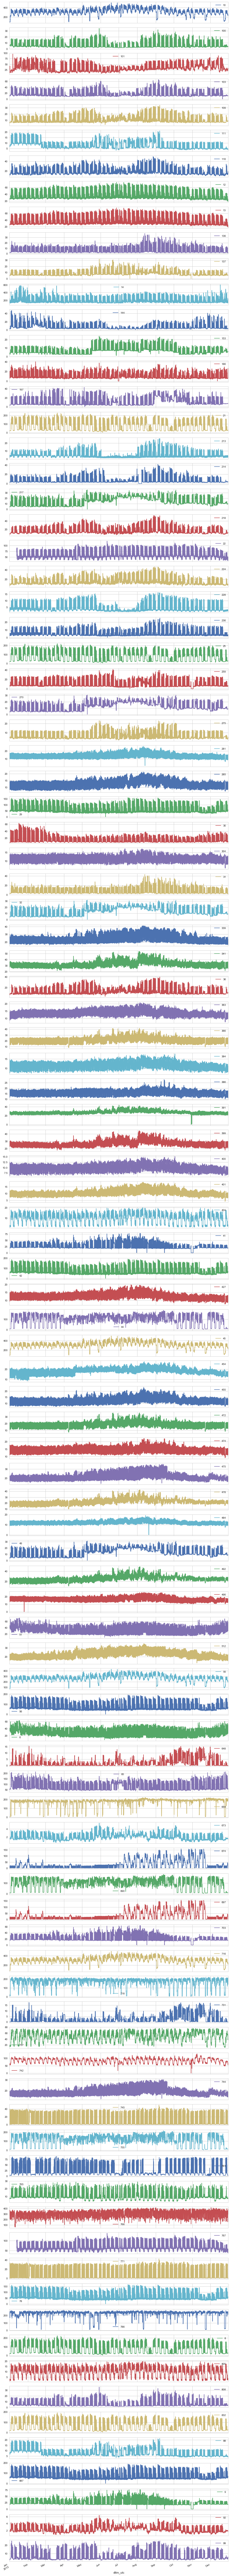

In [53]:
all_raw_df_valuesonly_hourly.plot(subplots=True, figsize=(15,200))

### Let's aggregate to annual data and plot

In [54]:
#Aggreating time to YearendTime
#[Link]('http://pandas.pydata.org/pandas-docs/stable/timeseries.html')

all_raw_df_valuesonly_annual = all_raw_df_valuesonly_hourly.resample('A', how='sum')

C:\Users\arjun\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: .resample() is now a deferred operation
use .resample(...).mean() instead of .resample(...)
C:\Users\arjun\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()


In [55]:
all_raw_df_valuesonly_annual

10          100            101  \
dttm_utc                                                              
2012-12-31 00:00:00+00:00  2.789726e+06  55742.22793  301808.456153   

                                     103           109           111  \
dttm_utc                                                               
2012-12-31 00:00:00+00:00  159626.760011  98459.519152  68382.404857   

                                     116             12             13  \
dttm_utc                                                                 
2012-12-31 00:00:00+00:00  163701.642387  346474.981141  350995.885502   

                                    136      ...                786  \
dttm_utc                                     ...                      
2012-12-31 00:00:00+00:00  69406.905445      ...       2.019870e+06   

                                       8           805           808  \
dttm_utc                                                               
2012-12-31 00:00:00+00:00  787876.171582  85648.398485  58306.514965   

                                     832            88            887  \
dttm_utc                                                                
2012-12-31 00:00:00+00:00  682097.247783  69844.587286  745863.598372   

                                       9            92            99  
dttm_utc                                                              
2012-12-31 00:00:00+00:00  245037.298013  21414.894877  58097.823438  

[1 rows x 100 columns]

In [56]:
# all_raw_df_valuesonly_annual.T.sort("2012-12-31 00:00:00+00:00").plot(kind='barh', figsize=(15,30), legend=False)
# plt.xlabel("Total kWh for 2012")
# plt.ylabel("SITE_ID")

### Total kWh by Site ID

In [148]:
#  t = meta_annualdata.drop(['SQ_FT','LAT','SITE_ID','LNG','TIME_ZONE','TZ_OFFSET','INDUSTRY','SUB_INDUSTRY'],axis=1)

In [149]:
# pd.DataFrame(meta_annualdata, columns=['SITE_ID', 'index'])

In [150]:
# t.sort_values(by='TotalkWh' ,axis='index',ascending=True ).plot(kind='barh', color='m', figsize=(15,30))
# plt.xlabel("Total kWh for 2012")
# plt.ylabel("SITE_ID")

In [163]:
annualdata = all_raw_df_valuesonly_annual.T 
annualdata.columns = ["TotalkWh"]

In [164]:
annualdata

TotalkWh
10   2.789726e+06
100  5.574223e+04
101  3.018085e+05
103  1.596268e+05
109  9.845952e+04
111  6.838240e+04
116  1.637016e+05
12   3.464750e+05
13   3.509959e+05
136  6.940691e+04
137  7.946710e+04
14   1.908315e+06
144  6.797536e+04
153  6.808426e+04
186  1.148337e+05
197  1.040486e+05
21   8.005481e+05
213  4.518209e+04
214  6.352165e+04
217  1.291269e+05
218  1.462953e+05
22   5.162678e+05
224  1.389911e+05
228  4.084813e+04
236  5.381211e+04
25   7.771035e+05
259  1.089566e+05
270  1.131756e+05
275  6.029518e+04
281  1.317377e+05
..            ...
654  1.534500e+06
673  1.846519e+04
674  2.830720e+05
690  9.107595e+05
697  2.793343e+05
703  2.048482e+05
716  2.748880e+06
718  1.500831e+06
731  2.047521e+04
737  4.397806e+05
742  7.385785e+05
744  1.659972e+05
745  1.516501e+05
755  1.072213e+06
761  2.515612e+05
765  9.941366e+04
766  2.869800e+06
767  5.889890e+05
771  1.298236e+05
78   6.525516e+05
786  2.019870e+06
8    7.878762e+05
805  8.564840e+04
808  5.830651e+04
832  6.820972e+05
88   6.984459e+04
887  7.458636e+05
9    2.450373e+05
92   2.141489e+04
99   5.809782e+04

[100 rows x 1 columns]

In [165]:
annualdata.dtypes

TotalkWh    float64
dtype: object

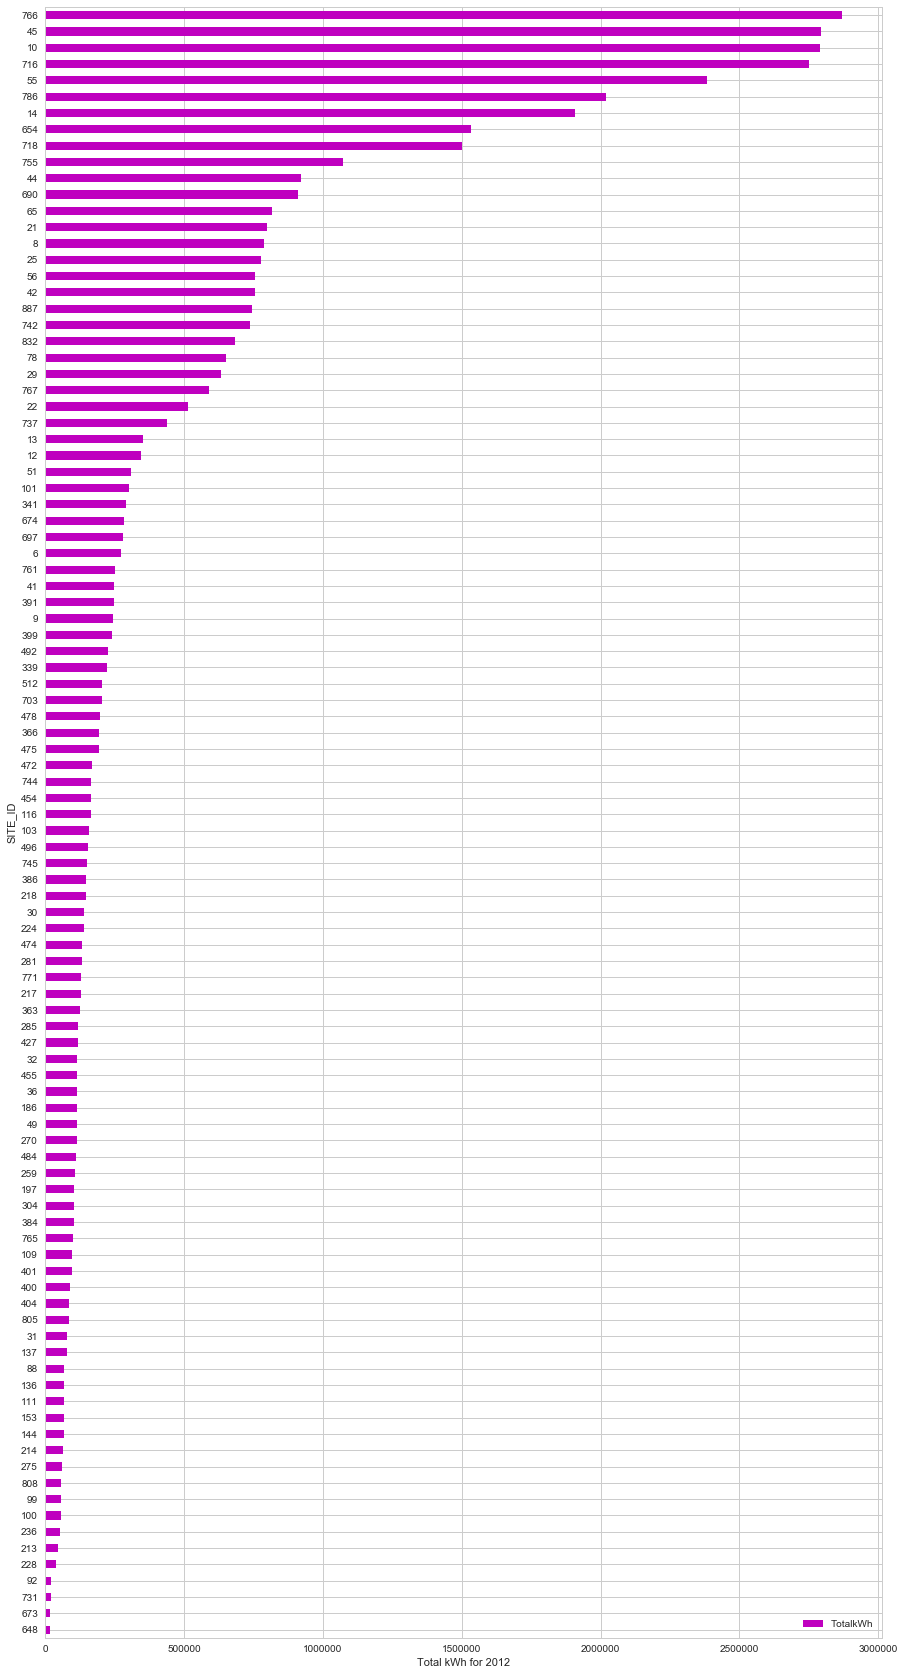

In [167]:
# Kwh for all the 100 Buildings

annualdata.sort_values(by='TotalkWh' ,axis='index',ascending=True ).plot(kind='barh', color='m', figsize=(15,30))
plt.xlabel("Total kWh for 2012")
plt.ylabel("SITE_ID")

### merging meta data with all the energy datasets. 

#### The problem is that we need to merge the annualdata.index with the meta_df.SITE_ID 
but one is a float and the other is a string. We must convert them to the same type to merge.

In [65]:
meta_df['SITE_ID'] = meta_df['SITE_ID'].apply(str)

In [66]:
meta_annualdata = pd.merge(meta_df, annualdata, left_on="SITE_ID", right_on="index")

In [67]:
meta_annualdata.drop(['LAT','LNG'],axis=1)

SITE_ID              INDUSTRY                   SUB_INDUSTRY    SQ_FT  \
0        6   Commercial Property  Shopping Center/Shopping Mall   161532   
1        8   Commercial Property  Shopping Center/Shopping Mall   823966   
2        9   Commercial Property               Corporate Office   169420   
3       10   Commercial Property  Shopping Center/Shopping Mall  1029798   
4       12   Commercial Property              Business Services   179665   
5       13   Commercial Property         Commercial Real Estate   185847   
6       14   Commercial Property              Business Services  1675720   
7       21   Commercial Property  Shopping Center/Shopping Mall   783982   
8       22   Commercial Property        Bank/Financial Services   318130   
9       25   Commercial Property  Shopping Center/Shopping Mall  1807149   
10      29   Commercial Property  Shopping Center/Shopping Mall   377537   
11      30   Commercial Property        Bank/Financial Services   496517   
12      31   Commercial Property         Commercial Real Estate   294651   
13      32   Commercial Property  Shopping Center/Shopping Mall   880941   
14      36   Commercial Property              Business Services   126205   
15      41   Commercial Property               Corporate Office   191554   
16      42   Commercial Property  Shopping Center/Shopping Mall  1237908   
17      44   Commercial Property  Shopping Center/Shopping Mall   192167   
18      45   Commercial Property  Shopping Center/Shopping Mall  1200131   
19      49   Commercial Property  Shopping Center/Shopping Mall   497092   
20      51   Commercial Property  Shopping Center/Shopping Mall    65961   
21      55   Commercial Property  Shopping Center/Shopping Mall   625142   
22      56   Commercial Property         Commercial Real Estate   428277   
23      65   Commercial Property         Commercial Real Estate   476246   
24      78   Commercial Property  Shopping Center/Shopping Mall  1037364   
25      88             Education       Primary/Secondary School    94150   
26      92             Education       Primary/Secondary School   105530   
27      99             Education       Primary/Secondary School    79503   
28     100             Education       Primary/Secondary School    81681   
29     101             Education       Primary/Secondary School   274418   
..     ...                   ...                            ...      ...   
70     478  Food Sales & Storage                  Grocer/Market    47257   
71     484  Food Sales & Storage                  Grocer/Market    40590   
72     492  Food Sales & Storage                  Grocer/Market    54469   
73     496  Food Sales & Storage                  Grocer/Market    52890   
74     512  Food Sales & Storage                  Grocer/Market    21980   
75     648      Light Industrial                Food Processing    20691   
76     654      Light Industrial                Food Processing    33596   
77     673      Light Industrial                Food Processing    91304   
78     674      Light Industrial                Food Processing    12884   
79     690      Light Industrial                  Manufacturing   183631   
80     697      Light Industrial                Food Processing     4650   
81     703      Light Industrial                Food Processing   117651   
82     716      Light Industrial                  Manufacturing   860258   
83     718      Light Industrial                Food Processing    28138   
84     731      Light Industrial                Food Processing     6236   
85     737      Light Industrial                Food Processing    23843   
86     742      Light Industrial                Food Processing    17717   
87     744      Light Industrial                Food Processing    22383   
88     745      Light Industrial                Food Processing     1943   
89     755      Light Industrial                  Manufacturing   225974   
90     761      Light Industrial                  M

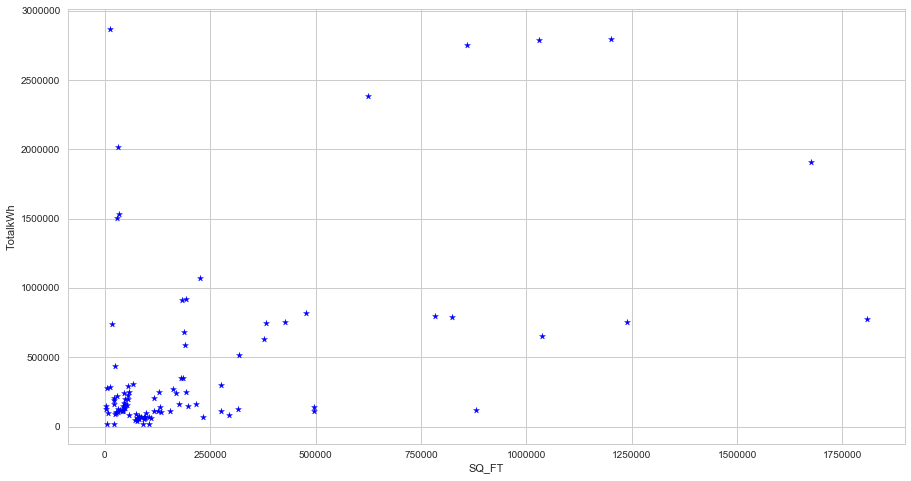

In [68]:
meta_annualdata.plot(kind='scatter', x="SQ_FT", y="TotalkWh", s=40, marker='*',color= 'blue',figsize=(15,8))

In [69]:
# Top_10_Kwh = meta_annualdata.groupby(['TotalkWh','INDUSTRY','SUB_INDUSTRY','SQ_FT']).size().sort_values(ascending=False).head(10)

In [70]:
# Top_10_Kwh

In [71]:
meta_annualdata.groupby(['INDUSTRY','SUB_INDUSTRY']).size().sort_values(ascending=False).head(10)

INDUSTRY              SUB_INDUSTRY                 
Food Sales & Storage  Grocer/Market                    25
Education             Primary/Secondary School         25
Light Industrial      Food Processing                  19
Commercial Property   Shopping Center/Shopping Mall    14
Light Industrial      Manufacturing                     5
Commercial Property   Commercial Real Estate            4
                      Business Services                 3
                      Corporate Office                  2
                      Bank/Financial Services           2
Light Industrial      Other Light Industrial            1
dtype: int64

In [115]:
pd.DataFrame(meta_annualdata, columns=['SITE_ID', 'index'])


SITE_ID index
0         6     6
1         8     8
2         9     9
3        10    10
4        12    12
5        13    13
6        14    14
7        21    21
8        22    22
9        25    25
10       29    29
11       30    30
12       31    31
13       32    32
14       36    36
15       41    41
16       42    42
17       44    44
18       45    45
19       49    49
20       51    51
21       55    55
22       56    56
23       65    65
24       78    78
25       88    88
26       92    92
27       99    99
28      100   100
29      101   101
..      ...   ...
70      478   478
71      484   484
72      492   492
73      496   496
74      512   512
75      648   648
76      654   654
77      673   673
78      674   674
79      690   690
80      697   697
81      703   703
82      716   716
83      718   718
84      731   731
85      737   737
86      742   742
87      744   744
88      745   745
89      755   755
90      761   761
91      765   765
92      766   766
93      767   767
94      771   771
95      786   786
96      805   805
97      808   808
98      832   832
99      887   887

[100 rows x 2 columns]

In [1]:
# #annualdata.sort_values(by='TotalkWh' ,axis='Site_ID',ascending=True ).plot(kind='barh', color='m', figsize=(15,30))
# plt.xlabel("Total kWh for 2012")
# plt.ylabel("SITE_ID")

In [72]:
# Top_10 = meta_annualdata.groupby(['TotalkWh','INDUSTRY','SUB_INDUSTRY','SQ_FT']).size().sort_values(ascending=False).head(10)

In [73]:
# Top_10_SQFT = meta_annualdata.groupby(['SQ_FT','TotalkWh','INDUSTRY','SUB_INDUSTRY','SITE_ID']).size().sort_values(ascending=False).head(10)

### Top 10 Buildings by Total KWh

In [74]:
meta_annualdata.SITE_ID = meta_annualdata.SITE_ID.astype(np.int64)

In [75]:
Top_10_kWh = meta_annualdata.nlargest(10, 'TotalkWh').drop(['LAT','LNG','TZ_OFFSET','INDUSTRY','SUB_INDUSTRY'],axis=1)

In [76]:
Top_10_kWh.dtypes

SITE_ID        int64
SQ_FT          int64
TIME_ZONE     object
index         object
TotalkWh     float64
dtype: object

In [77]:
Top_10_kWh=Top_10_kWh.reset_index().drop(['index','level_0'],axis=1)

In [78]:
Top_10_kWh

SITE_ID    SQ_FT            TIME_ZONE      TotalkWh
0      766    12261       America/Denver  2.869800e+06
1       45  1200131      America/Chicago  2.793122e+06
2       10  1029798     America/New_York  2.789726e+06
3      716   860258      America/Chicago  2.748880e+06
4       55   625142     America/New_York  2.384033e+06
5      786    31727       America/Denver  2.019870e+06
6       14  1675720  America/Los_Angeles  1.908315e+06
7      654    33596      America/Chicago  1.534500e+06
8      718    28138     America/New_York  1.500831e+06
9      755   225974     America/New_York  1.072213e+06

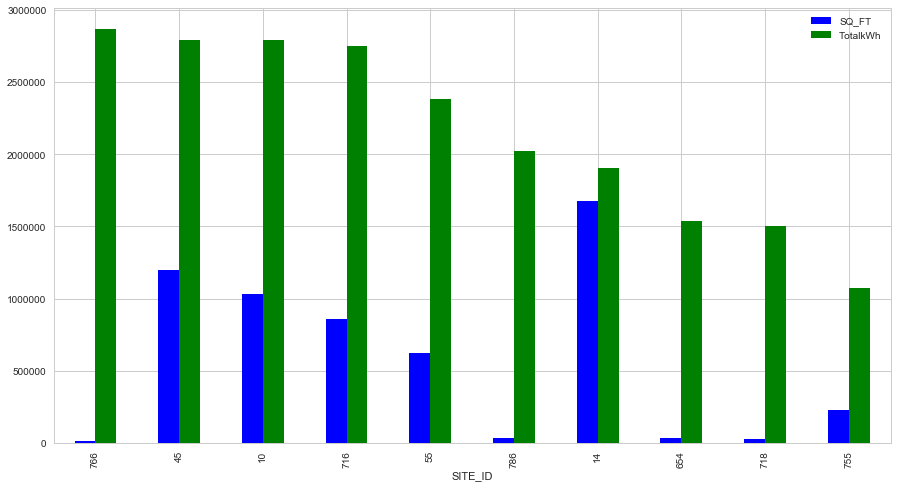

In [79]:
# Plotting Top 10 Buildings by  Total Power consumption and Squarefoot 

Top_10_kWh.plot(kind='bar',x='SITE_ID',figsize=(15,8), color='bg')

# Top_10_kWh.sort_values(by='TotalkWh' ,axis='index',ascending=True ).plot(kind='bar', color='cmr', figsize=(15,8))
# plt.xlabel("Total kWh for 2012")
# plt.ylabel("")

### Top 10 Buildings by Square footage

In [80]:
Top_10_SQFT = meta_annualdata.nlargest(10, 'SQ_FT').drop(['index','LAT','LNG','TZ_OFFSET','INDUSTRY','SUB_INDUSTRY'],axis=1)

In [81]:
Top_10_SQFT = Top_10_SQFT.reset_index().drop(['index'],axis=1)

In [82]:
Top_10_SQFT

SITE_ID    SQ_FT            TIME_ZONE      TotalkWh
0       25  1807149     America/New_York  7.771035e+05
1       14  1675720  America/Los_Angeles  1.908315e+06
2       42  1237908     America/New_York  7.550587e+05
3       45  1200131      America/Chicago  2.793122e+06
4       78  1037364      America/Chicago  6.525516e+05
5       10  1029798     America/New_York  2.789726e+06
6       32   880941      America/Chicago  1.165130e+05
7      716   860258      America/Chicago  2.748880e+06
8        8   823966     America/New_York  7.878762e+05
9       21   783982     America/New_York  8.005481e+05

C:\Users\arjun\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


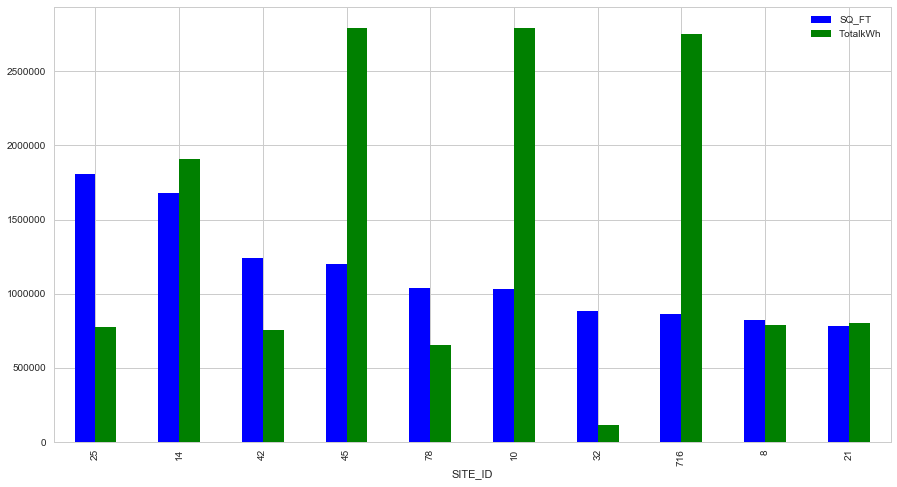

In [83]:
# Plotting Top 10 Buildings by Squarefoot and Total Power consumption

Top_10_SQFT.sort('SQ_FT',ascending=False).plot(kind='bar',x='SITE_ID',figsize=(15,8), color='bg')


### mean Hourly distributed 

In [84]:
#Plotting Power consumption by indexing time to mean hour.

#Plotting Power consumption by indexing time to mean hour.all_raw_df_valuesonly.groupby(all_raw_df_valuesonly.index.hour).mean().plot(subplots=True, figsize=(15,200))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001914059C470>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000001915E9F5A58>], dtype=object)

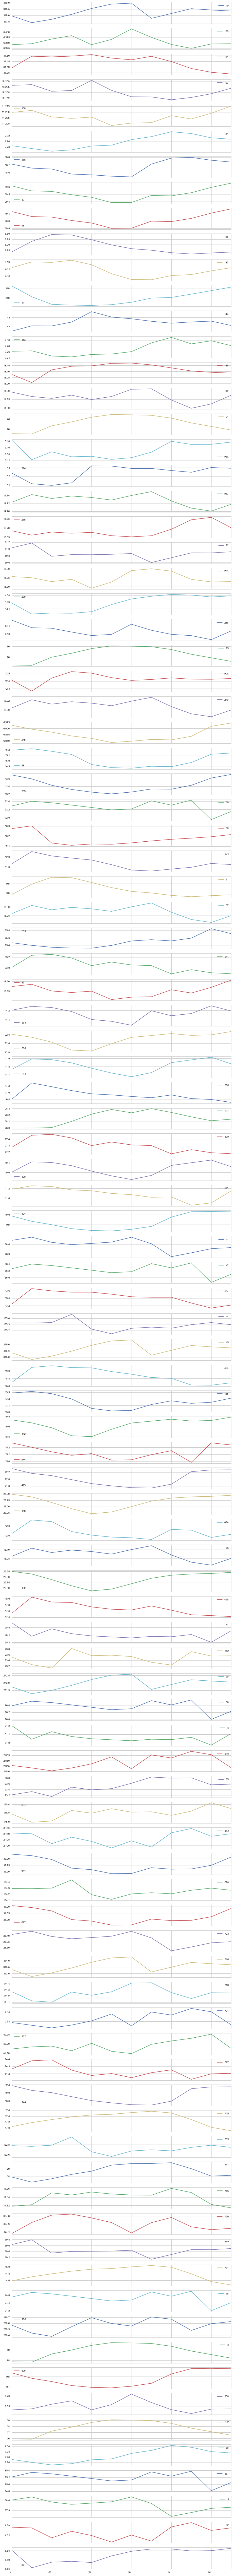

In [85]:
##Plotting Power consumption by indexing time to mean minute.
all_raw_df_valuesonly.groupby(all_raw_df_valuesonly.index.minute).mean().plot(subplots=True, figsize=(15,200))

In [86]:
# Maxium Power for all the 100 buildings. 
max_values= pd.DataFrame(all_raw_df_valuesonly.max())

In [87]:
max_values.head()

0
10   527.3773
100   39.3927
101  108.0029
103   78.3172
109   36.1648

In [88]:
# Aggregate value of TotalkWh for all 100 buildings for particular time
agg = all_raw_df_valuesonly.sum(axis = 1)

In [89]:
# agg['2012-12-31 23:25:00+00:00']

In [90]:
agg = pd.DataFrame(agg)

agg

0
dttm_utc                            
2012-01-01 00:05:00+00:00  1726.8096
2012-01-01 00:10:00+00:00  2642.5760
2012-01-01 00:15:00+00:00  2626.6457
2012-01-01 00:20:00+00:00  2637.1007
2012-01-01 00:25:00+00:00  2598.3540
2012-01-01 00:30:00+00:00  2560.4280
2012-01-01 00:35:00+00:00  2543.9534
2012-01-01 00:40:00+00:00  2526.7476
2012-01-01 00:45:00+00:00  2513.8649
2012-01-01 00:50:00+00:00  2519.6888
2012-01-01 00:55:00+00:00  2526.5838
2012-01-01 01:00:00+00:00  2540.7799
2012-01-01 01:05:00+00:00  2547.4173
2012-01-01 01:10:00+00:00  2548.3533
2012-01-01 01:15:00+00:00  2512.5404
2012-01-01 01:20:00+00:00  2520.6372
2012-01-01 01:25:00+00:00  2489.0430
2012-01-01 01:30:00+00:00  2511.9719
2012-01-01 01:35:00+00:00  2482.3802
2012-01-01 01:40:00+00:00  2491.4451
2012-01-01 01:45:00+00:00  2457.7256
2012-01-01 01:50:00+00:00  2429.8406
2012-01-01 01:55:00+00:00  2452.8043
2012-01-01 02:00:00+00:00  2449.3147
2012-01-01 02:05:00+00:00  2473.4051
2012-01-01 02:10:00+00:00  2482.0708
2012-01-01 02:15:00+00:00  2503.4510
2012-01-01 02:20:00+00:00  2486.8277
2012-01-01 02:25:00+00:00  2451.6640
2012-01-01 02:30:00+00:00  2455.0792
...                              ...
2012-12-31 21:35:00+00:00  4383.1713
2012-12-31 21:40:00+00:00  4352.2627
2012-12-31 21:45:00+00:00  4297.1701
2012-12-31 21:50:00+00:00  4198.0580
2012-12-31 21:55:00+00:00  4094.3560
2012-12-31 22:00:00+00:00  4105.4447
2012-12-31 22:05:00+00:00  4105.9373
2012-12-31 22:10:00+00:00  4096.9884
2012-12-31 22:15:00+00:00  4104.9504
2012-12-31 22:20:00+00:00  4108.5388
2012-12-31 22:25:00+00:00  4092.2419
2012-12-31 22:30:00+00:00  4140.8161
2012-12-31 22:35:00+00:00  4086.3114
2012-12-31 22:40:00+00:00  4029.8973
2012-12-31 22:45:00+00:00  4040.0502
2012-12-31 22:50:00+00:00  4087.8783
2012-12-31 22:55:00+00:00  4042.4563
2012-12-31 23:00:00+00:00  4058.5053
2012-12-31 23:05:00+00:00  4037.8681
2012-12-31 23:10:00+00:00  3967.1842
2012-12-31 23:15:00+00:00  3930.9879
2012-12-31 23:20:00+00:00  3946.5055
2012-12-31 23:25:00+00:00  3908.6474
2012-12-31 23:30:00+00:00  3877.5435
2012-12-31 23:35:00+00:00  3874.9014
2012-12-31 23:40:00+00:00  3868.5148
2012-12-31 23:45:00+00:00  3823.1735
2012-12-31 23:50:00+00:00  3850.0199
2012-12-31 23:55:00+00:00  3847.1291
2013-01-01 00:00:00+00:00  3821.4506

[105408 rows x 1 columns]

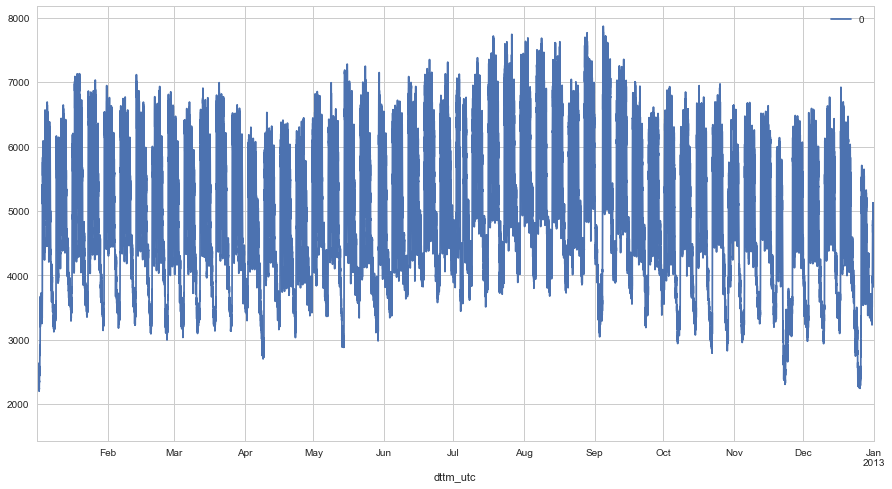

In [91]:
# Plotting Agg values 

agg.plot(kind='line',figsize=(15,8))
# savefig('C:/Users/arjun/Desktop/figure.jpeg')


In [96]:
all_raw_df_valuesonly_hourly

C:\Users\arjun\Anaconda3\lib\site-packages\IPython\utils\dir2.py:65: FutureWarning: .resample() is now a deferred operation
use .resample(...).mean() instead of .resample(...)
  canary = getattr(obj, '_ipython_canary_method_should_not_exist_', None)
C:\Users\arjun\Anaconda3\lib\site-packages\IPython\utils\dir2.py:74: FutureWarning: .resample() is now a deferred operation
use .resample(...).mean() instead of .resample(...)
  m = getattr(obj, name, None)


DatetimeIndexResampler [freq=<Hour>, axis=0, closed=left, label=left, convention=start, base=0]

In [99]:
##Sum of each building for whole year
sum_year =all_raw_df_valuesonly.sum(axis = 0)

In [104]:
sum_year = pd.DataFrame(sum_year)

sum_year

0
10   3.354402e+07
100  6.701098e+05
101  3.630819e+06
103  1.918911e+06
109  1.183645e+06
111  8.219271e+05
116  1.968174e+06
12   4.164842e+06
13   4.219160e+06
136  8.342647e+05
137  9.554303e+05
14   2.298005e+07
144  8.169882e+05
153  8.190885e+05
186  1.382178e+06
197  1.250574e+06
21   9.613851e+06
213  5.429483e+05
214  7.632805e+05
217  1.552427e+06
218  1.758856e+06
22   6.208865e+06
224  1.670287e+06
228  4.908628e+05
236  6.465011e+05
25   9.332303e+06
259  1.310203e+06
270  1.360648e+06
275  7.248929e+05
281  1.584370e+06
..            ...
654  1.846825e+07
673  2.220264e+05
674  3.398533e+06
690  1.093177e+07
697  3.353660e+06
703  2.463796e+06
716  3.305298e+07
718  1.805096e+07
731  2.458196e+05
737  5.290360e+06
742  8.878639e+06
744  1.996636e+06
745  1.823408e+06
755  1.286969e+07
761  3.019674e+06
765  1.195270e+06
766  3.453239e+07
767  7.083304e+06
771  1.561001e+06
78   7.856508e+06
786  2.430321e+07
8    9.461673e+06
805  1.030910e+06
808  7.009310e+05
832  8.191383e+06
88   8.395100e+05
887  8.979955e+06
9    2.947185e+06
92   2.574956e+05
99   6.984542e+05

[100 rows x 1 columns]

### END !